In [378]:
#!pip install yfinance

In [425]:
import pandas as pd

In [426]:
import yfinance as yf
timeframe = '3y'

In [427]:

#MTG:  Deleted Shanghai Exchange
stocks = ("^GSPC", "^IXIC", "^N100", "^NDX")
def load_data(ticker):
    data = yf.download(ticker, period=timeframe)
    data.reset_index(inplace=True)
    return data

df_stocks = load_data(stocks)
df_stocks.set_index('Date', inplace=True)
df_stocks = df_stocks['Open']

df_stocks = df_stocks.reset_index(level=0)
df_stocks = df_stocks.rename(columns={'Date': 'datetime'})

[*********************100%***********************]  4 of 4 completed


In [428]:
df_stocks

,datetime,^GSPC,^IXIC,^N100,^NDX
0,2019-07-15,3017.800049,8263.179688,1079.069946,7961.069824
1,2019-07-16,3012.129883,8251.660156,1079.319946,7958.439941
2,2019-07-17,3005.100098,8224.000000,1084.290039,7927.910156
3,2019-07-18,2978.870117,8151.759766,1075.030029,7850.120117
4,2019-07-19,3004.260010,8241.339844,1086.660034,7944.859863
...,...,...,...,...,...
773,2022-07-11,3880.939941,11524.490234,1154.849976,12008.759766
774,2022-07-12,3851.949951,11420.889648,1162.000000,11926.839844
775,2022-07-13,3779.669922,11056.549805,1169.270020,11523.910156
776,2022-07-14,3763.989990,11151.209961,1163.349976,11637.179688


In [429]:
import san
import pandas as pd

san.ApiConfig.api_key = ''
year = 3
days = 365

#MTG:  deleted future metrics and updated old metrics columns
old_metrics = ['price_usd', 
           'volume_usd',
           'twitter_followers',
           'daily_opening_price_usd', 
           'daily_high_price_usd', 
           'daily_low_price_usd', 
           'daily_closing_price_usd', 
           'daily_avg_price_usd', 
           'daily_trading_volume_usd', 
           'marketcap_usd', 
           'mvrv_usd', 
           'nvt', 
           'circulation_1d', 
           'dormant_circulation_90d', 
           'exchange_balance', 
           'daily_active_addresses', 
           'network_growth',
           'transaction_volume', 
           'transaction_volume_usd', 
           'fees_usd',
           'velocity', 
           'dev_activity', 
           'dev_activity_contributors_count', 
           'sentiment_positive_total', 
           'sentiment_negative_total', 
           'sentiment_balance_total', 
           'social_dominance_total', 
           'social_volume_total', 
           'unique_social_volume_total_5m', 
           'whale_transaction_count_100k_usd_to_inf', 
           'whale_transaction_count_1m_usd_to_inf'
           ]

metrics = ['price_usd', 
           'volume_usd',
           'twitter_followers',
           'daily_trading_volume_usd', 
           'daily_active_addresses', 
           'social_volume_total', 
           'whale_transaction_count_1m_usd_to_inf'
           ]

tketh = 'ethereum'
tkbtc = 'bitcoin'

df_eth = pd.DataFrame()
df_btc = pd.DataFrame()

for metric in metrics:
    df_eth[metric] = san.get(
        metric + '/' + tketh,
        from_date=f"utc_now - {year*days}d",
        to_date="utc_now",
        interval="1d"
    )


In [431]:
#df_eth['twitter_followers'].iloc[0] = 0

In [432]:
#df_eth['twitter_followers'] = df_eth['twitter_followers'].interpolate()


In [433]:

df_btc['price_usd'] = san.get(
        'price_usd' + '/' + tkbtc,
        from_date=f"utc_now - {year*days}d",
        to_date="utc_now",
        interval="1d"
    )

df_btc = df_btc.rename(columns={'price_usd': 'btc_price_usd'})

In [434]:
df_crypto = pd.merge(df_eth, df_btc, how='outer', on='datetime')

In [435]:
df_crypto.index = pd.to_datetime(df_crypto.index)

In [436]:
df_crypto = df_crypto.reset_index(level=0)

In [437]:
df_crypto['datetime'] = df_crypto['datetime'].apply(lambda x: x.replace(tzinfo=None))

In [438]:
# DEFILLAMA

import requests

url_total_TVL = 'https://api.llama.fi/charts'
url_eth_TVL = 'https://api.llama.fi/charts/Ethereum'

r_total_TVL = requests.get(url_total_TVL)
r_eth_TVL = requests.get(url_eth_TVL)

json_total_TVL = r_total_TVL.json()
json_eth_TVL = r_eth_TVL.json()
df_total_TVL = pd.DataFrame(json_total_TVL)
df_eth_TVL = pd.DataFrame(json_eth_TVL)

In [439]:

df_total_TVL = df_total_TVL.rename(columns={'totalLiquidityUSD': 'total_TVL', 'date': 'datetime'})
df_eth_TVL = df_eth_TVL.rename(columns={'totalLiquidityUSD': 'eth_TVL', 'date': 'datetime'})


In [440]:
df_tvl = pd.merge(df_total_TVL, df_eth_TVL, how='outer', on='datetime')

In [441]:
from datetime import datetime 
df_tvl['datetime'] = df_tvl['datetime'].apply(lambda x:datetime.utcfromtimestamp(int(x)).strftime('%Y-%m-%d %H:%M:%S'))

In [442]:
df_tvl['datetime'] = pd.to_datetime(df_tvl['datetime'])

In [443]:
# CRYPTOSLAM
eth_NFT_sales = pd.read_csv(os.path.join('..','raw_data', 'ETH NFT Sales.csv'))
total_NFT_sales = pd.read_csv(os.path.join('..','raw_data', 'Total NFT Sales.csv'))

In [445]:
eth_NFT_sales = eth_NFT_sales.rename(columns={'Sales (USD) (y)': 'eth_NFT_sales', 'Unique Buyers (y)': 'eth_NFT_buyers', 'DateTime': 'datetime'})
total_NFT_sales = total_NFT_sales.rename(columns={'Sales (USD) (y)': 'total_NFT_sales', 'Unique Buyers (y)': 'total_NFT_buyers', 'DateTime': 'datetime'})

In [446]:
df_NFT = pd.merge(eth_NFT_sales, total_NFT_sales, how='outer', on='datetime')


In [447]:
df_NFT['datetime'] = pd.to_datetime(df_NFT['datetime'])

In [448]:
#Etherscan

daily_transactions = pd.read_csv(os.path.join('..','raw_data', 'Daily Transactions_7.15.22.csv'))
daily_transactions = daily_transactions.rename(columns={'Date(UTC)': 'datetime', 'UnixTimeStamp': 'timestamp', 'Value': 'daily transactions'})
daily_transactions.drop(['timestamp'],axis = 1)
daily_transactions['datetime']=daily_transactions['datetime'].astype('datetime64')



In [449]:
data = pd.DataFrame()
#MTG:  changed from outer to left
data = pd.merge(df_crypto, df_NFT, how='left', on='datetime')
data = pd.merge(data, df_tvl, how='left', on='datetime')
data = pd.merge(data, df_stocks, how='left', on='datetime')
data = pd.merge(data, daily_transactions, how='left', on='datetime')

#MTG:  interpolated eth and NFt sales
features_toplot = (['^GSPC', '^IXIC', '^N100', '^NDX', 'twitter_followers','eth_NFT_sales', 'eth_NFT_buyers','total_NFT_sales', 'total_NFT_buyers'])
for feature in features_toplot:
    data[feature] = data[feature].interpolate()

In [450]:
data.head()

,datetime,price_usd,volume_usd,twitter_followers,daily_trading_volume_usd,daily_active_addresses,social_volume_total,whale_transaction_count_1m_usd_to_inf,btc_price_usd,eth_NFT_sales,...,total_NFT_sales,total_NFT_buyers,total_TVL,eth_TVL,^GSPC,^IXIC,^N100,^NDX,timestamp,daily transactions
0,2019-07-16,199.188675,9.036620e+09,446162.0,9.036620e+09,239584.0,1716.0,29.0,9477.642042,506.64,...,506.64,66.0,4.377302e+08,4.377302e+08,3012.129883,8251.660156,1079.319946,7958.439941,1.563235e+09,1003278.0
1,2019-07-17,211.484963,9.387748e+09,446203.0,9.387748e+09,284307.0,2850.0,72.0,9693.802724,4103.50,...,4105.19,125.0,4.474120e+08,4.474120e+08,3005.100098,8224.000000,1084.290039,7927.910156,1.563322e+09,830029.0
2,2019-07-18,226.657697,9.327952e+09,446255.0,9.327952e+09,274207.0,2502.0,64.0,10653.956443,3423.99,...,3423.99,132.0,4.262525e+08,4.262525e+08,2978.870117,8151.759766,1075.030029,7850.120117,1.563408e+09,667874.0
3,2019-07-19,221.333421,7.606433e+09,446283.0,7.606433e+09,268338.0,2257.0,57.0,10530.732626,2842.53,...,2860.87,111.0,4.186174e+08,4.186174e+08,3004.260010,8241.339844,1086.660034,7944.859863,1.563494e+09,815548.0
4,2019-07-20,229.119222,7.976246e+09,446335.0,7.976246e+09,237968.0,2225.0,28.0,10767.139523,3675.82,...,3727.44,126.0,4.199713e+08,4.199713e+08,2996.816650,8218.223307,1085.090007,7917.366536,1.563581e+09,584085.0


In [451]:
# MTG:  converted all USD amounts to ETH
data["volume_ETH"] = data["volume_usd"]/data["price_usd"]
data["daily_trading_volume_ETH"] = data["daily_trading_volume_usd"]/data["price_usd"]
data["eth_NFT_sales_ETH"] = data["eth_NFT_sales"]/data["price_usd"]
data["total_NFT_sales_ETH"] = data["total_NFT_sales"]/data["price_usd"]
data["total_TVL_ETH"] = data["total_TVL"]/data["price_usd"]
data["eth_TVL_ETH"] = data["eth_TVL"]/data["price_usd"]




In [452]:
# MTG:  dropped old columns
data = data.drop(['volume_usd', 'daily_trading_volume_usd','eth_NFT_sales','total_NFT_sales','total_TVL','eth_TVL'],axis = 1)

In [453]:
#interpolated missing values
# data['total_TVL_ETH'].iloc[0] = 0
# data['eth_TVL_ETH'].iloc[0] = 0


In [454]:
# data['total_TVL_ETH'] = data['total_TVL_ETH'].interpolate()
# data['eth_TVL_ETH'] = data['eth_TVL_ETH'].interpolate()

In [455]:
data.head()

,datetime,price_usd,twitter_followers,daily_active_addresses,social_volume_total,whale_transaction_count_1m_usd_to_inf,btc_price_usd,eth_NFT_buyers,total_NFT_buyers,^GSPC,...,^N100,^NDX,timestamp,daily transactions,volume_ETH,daily_trading_volume_ETH,eth_NFT_sales_ETH,total_NFT_sales_ETH,total_TVL_ETH,eth_TVL_ETH
0,2019-07-16,199.188675,446162.0,239584.0,1716.0,29.0,9477.642042,66.0,66.0,3012.129883,...,1079.319946,7958.439941,1.563235e+09,1003278.0,4.536714e+07,4.536714e+07,2.543518,2.543518,2.197565e+06,2.197565e+06
1,2019-07-17,211.484963,446203.0,284307.0,2850.0,72.0,9693.802724,124.0,125.0,3005.100098,...,1084.290039,7927.910156,1.563322e+09,830029.0,4.438967e+07,4.438967e+07,19.403271,19.411262,2.115574e+06,2.115574e+06
2,2019-07-18,226.657697,446255.0,274207.0,2502.0,64.0,10653.956443,132.0,132.0,2978.870117,...,1075.030029,7850.120117,1.563408e+09,667874.0,4.115436e+07,4.115436e+07,15.106436,15.106436,1.880600e+06,1.880600e+06
3,2019-07-19,221.333421,446283.0,268338.0,2257.0,57.0,10530.732626,111.0,111.0,3004.260010,...,1086.660034,7944.859863,1.563494e+09,815548.0,3.436640e+07,3.436640e+07,12.842751,12.925612,1.891343e+06,1.891343e+06
4,2019-07-20,229.119222,446335.0,237968.0,2225.0,28.0,10767.139523,125.0,126.0,2996.816650,...,1085.090007,7917.366536,1.563581e+09,584085.0,3.481264e+07,3.481264e+07,16.043263,16.268561,1.832981e+06,1.832981e+06


In [456]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1096 entries, 0 to 1095
Data columns (total 21 columns):
 #   Column                                 Non-Null Count  Dtype         
---  ------                                 --------------  -----         
 0   datetime                               1096 non-null   datetime64[ns]
 1   price_usd                              1096 non-null   float64       
 2   twitter_followers                      1096 non-null   float64       
 3   daily_active_addresses                 1095 non-null   float64       
 4   social_volume_total                    1096 non-null   float64       
 5   whale_transaction_count_1m_usd_to_inf  1096 non-null   float64       
 6   btc_price_usd                          1096 non-null   float64       
 7   eth_NFT_buyers                         1096 non-null   float64       
 8   total_NFT_buyers                       1096 non-null   float64       
 9   ^GSPC                                  1096 non-null   float64 

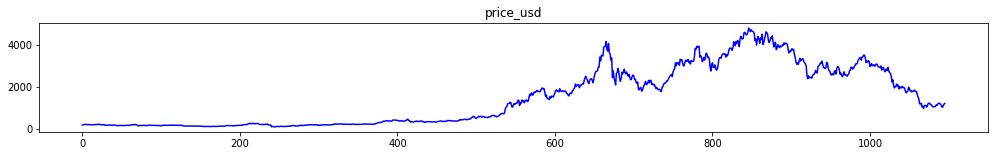

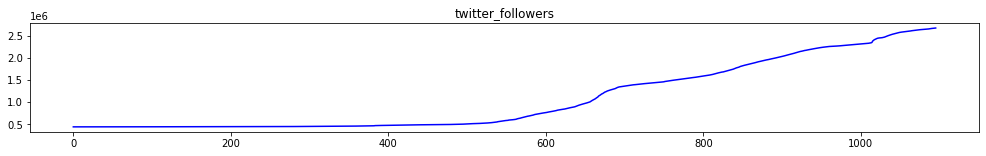

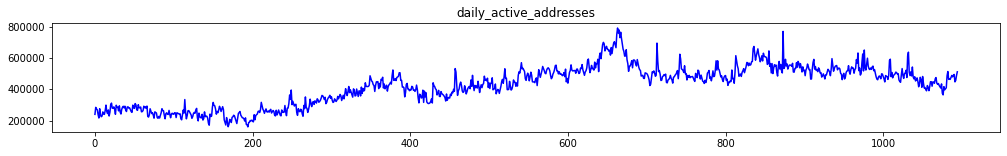

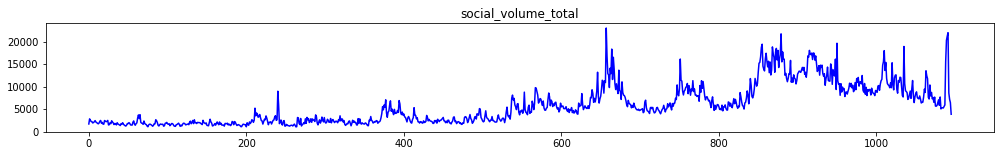

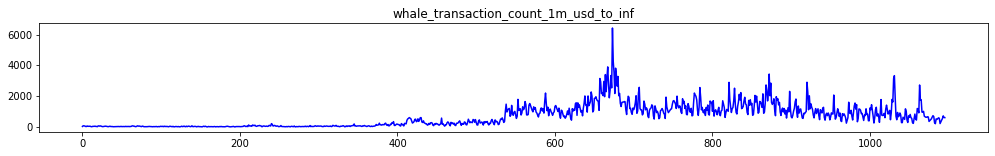

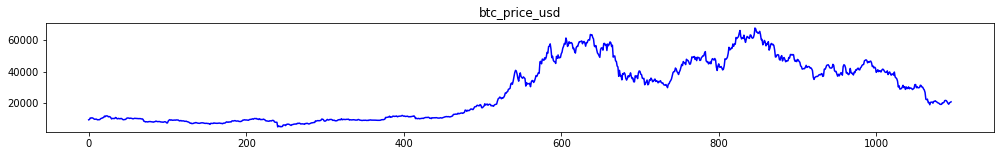

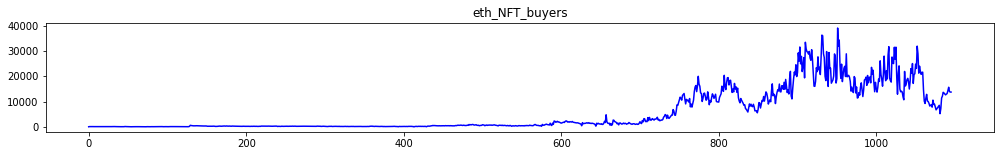

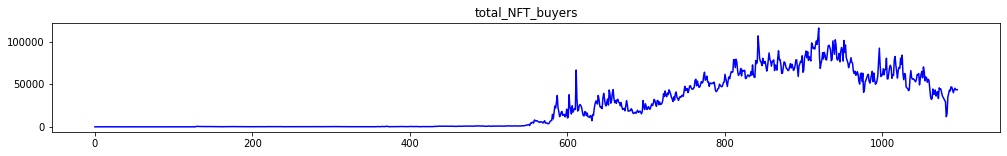

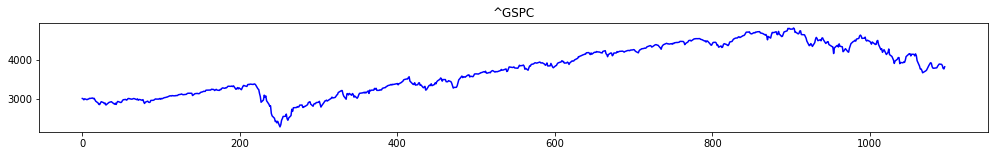

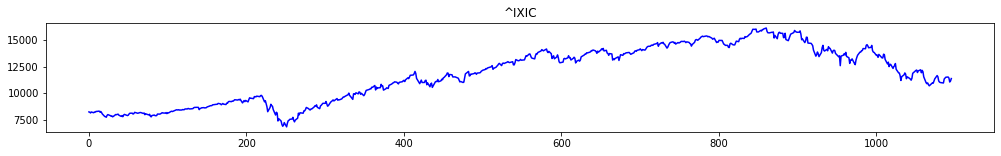

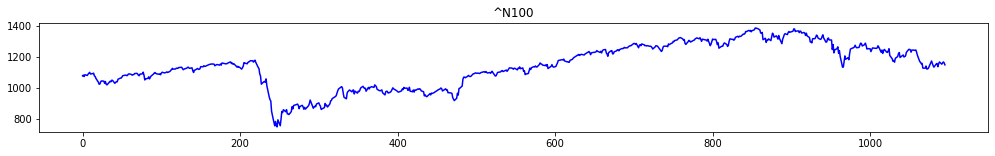

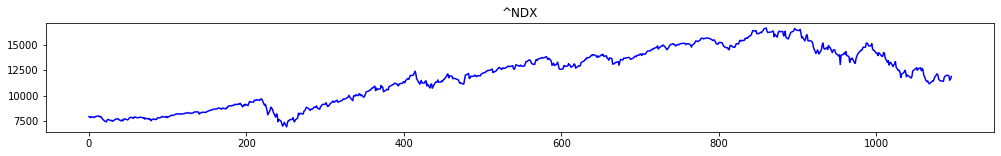

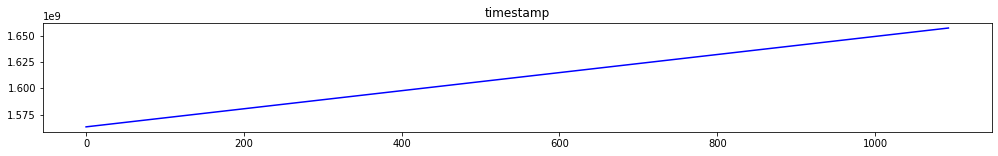

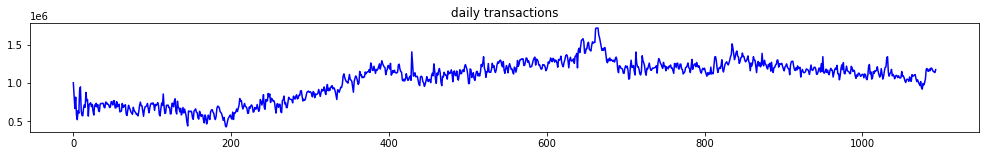

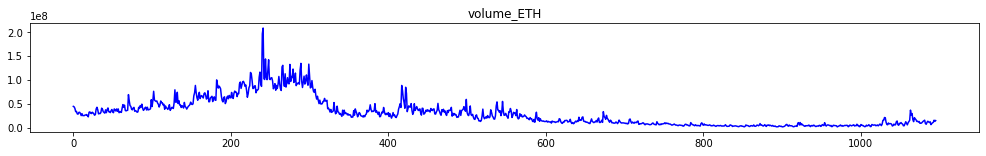

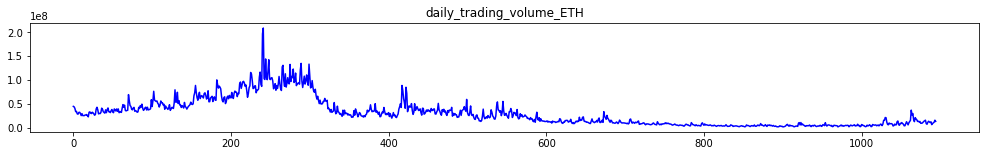

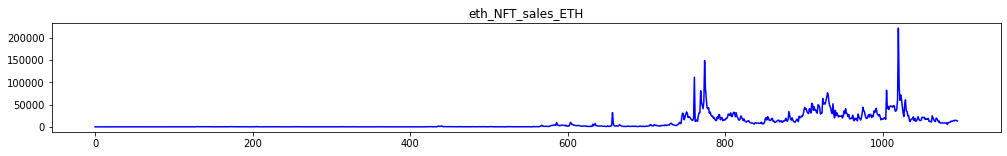

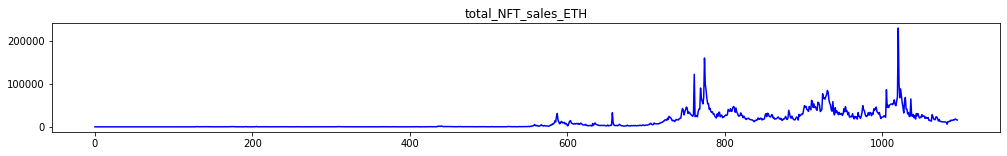

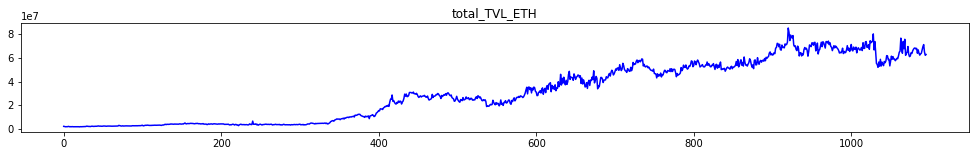

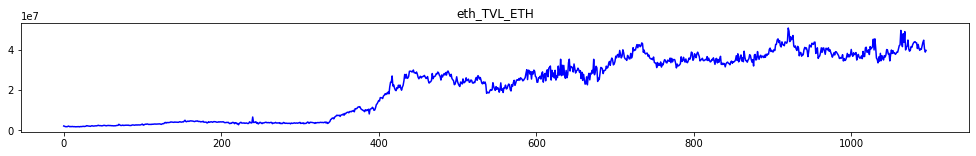

In [457]:
import matplotlib.pyplot as plt
%matplotlib inline

for col in data.drop(columns='datetime').columns:
    color="orange" if col == "Price" else "blue"
    data[col].plot(figsize=(17, 2), color=color)
    plt.title(col)
    plt.show()
    


In [458]:
import numpy as np
#MTG:  Interpolated above
# data.total_TVL.replace(np.nan, 0, inplace=True)
# data.eth_TVL.replace(np.nan, 0, inplace=True)

In [459]:
data = data.iloc[2:]
data = data.iloc[:-1]

In [460]:
data.to_csv(os.path.join('..','raw_data', 'data_advanced.csv'))

In [461]:
print(data.isnull().sum().sort_values(ascending=False))



daily transactions                       1
timestamp                                1
datetime                                 0
^N100                                    0
total_TVL_ETH                            0
total_NFT_sales_ETH                      0
eth_NFT_sales_ETH                        0
daily_trading_volume_ETH                 0
volume_ETH                               0
^NDX                                     0
^IXIC                                    0
price_usd                                0
^GSPC                                    0
total_NFT_buyers                         0
eth_NFT_buyers                           0
btc_price_usd                            0
whale_transaction_count_1m_usd_to_inf    0
social_volume_total                      0
daily_active_addresses                   0
twitter_followers                        0
eth_TVL_ETH                              0
dtype: int64


In [119]:
#MTG:  What does this do?  Can we remove?3e4ne7awzdf2yy65_v7liam22jvyryahn
total_features_toplot = (['price_usd', 'volume_usd', 'twitter_followers',
       'daily_opening_price_usd', 'daily_high_price_usd',
       'daily_low_price_usd', 'daily_closing_price_usd', 'daily_avg_price_usd',
       'daily_trading_volume_usd', 'marketcap_usd', 'mvrv_usd', 'nvt',
       'circulation_1d', 'dormant_circulation_90d', 'exchange_balance',
       'daily_active_addresses', 'network_growth', 'transaction_volume',
       'transaction_volume_usd', 'fees_usd', 'velocity', 'dev_activity',
       'dev_activity_contributors_count', 'community_messages_count_total',
       'sentiment_positive_total', 'sentiment_negative_total',
       'sentiment_balance_total', 'social_dominance_total',
       'social_volume_total', 'unique_social_volume_total_5m',
       'whale_transaction_count_100k_usd_to_inf',
       'whale_transaction_count_1m_usd_to_inf', 'btc_price_usd',
       'eth_NFT_sales', 'eth_NFT_buyers', 'total_NFT_sales',
       'total_NFT_buyers', 'total_TVL', 'eth_TVL', '000001.SS', '^GSPC',
       '^IXIC', '^N100', '^NDX'])



In [120]:
#MTG:  What does this do?  Can we remove?3e4ne7awzdf2yy65_v7liam22jvyryahn
total_features = ('price_usd', 'volume_usd', 'twitter_followers',
       'daily_opening_price_usd', 'daily_high_price_usd',
       'daily_low_price_usd', 'daily_closing_price_usd', 'daily_avg_price_usd',
       'daily_trading_volume_usd', 'marketcap_usd', 'mvrv_usd', 'nvt',
       'circulation_1d', 'dormant_circulation_90d', 'exchange_balance',
       'daily_active_addresses', 'network_growth', 'transaction_volume',
       'transaction_volume_usd', 'fees_usd', 'velocity', 'dev_activity',
       'dev_activity_contributors_count', 'community_messages_count_total',
       'sentiment_positive_total', 'sentiment_negative_total',
       'sentiment_balance_total', 'social_dominance_total',
       'social_volume_total', 'unique_social_volume_total_5m',
       'whale_transaction_count_100k_usd_to_inf',
       'whale_transaction_count_1m_usd_to_inf', 'btc_price_usd',
       'eth_NFT_sales', 'eth_NFT_buyers', 'total_NFT_sales',
       'total_NFT_buyers', 'total_TVL', 'eth_TVL', '000001.SS', '^GSPC',
       '^IXIC', '^N100', '^NDX')

